In [1]:
import DataProvider
prov = DataProvider.DataProvider()

reading helper data on path: ./Data/Helper/backGround_street.wav
reading helper data on path: ./Data/Helper/backGround_noice.wav
reading helper data on path: ./Data/Helper/backGround_nature.wav
[new value of  19
------new value of  40
-----new value of  64
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------new value of  70
------------------------------------------------------------------------------------------------------------------------new value of  72
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
[#############################

In [2]:
import numpy as np
X = list()
y = list()
trainVal = list()

In [3]:
while prov.hasNext(True):
    Xt, yt = prov.next(True)
    for i in range(len(yt)):
        if yt[i] == 1:
            trainVal.append(i+1)
            
    X.append(Xt)
    y.append(yt)

In [4]:
X = np.nan_to_num(np.matrix(X))
y = np.matrix(y)

X.shape, y.shape

((6880, 1440), (6880, 5))

In [5]:
X2 = list()
y2 = list()
actualVal = list()

In [6]:
while prov.hasNext(False):
    X2t, y2t = prov.next(False)
    actualVal.append(y2t)
    
    k = np.zeros(5)
    k[y2t - 1] = 1
    
    X2.append(X2t)
    y2.append(k)

In [7]:
X2 = np.nan_to_num(np.matrix(X2))
y2 = np.matrix(y2)

X2.shape, y2.shape

((27, 1440), (27, 5))

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

Using TensorFlow backend.


In [36]:
model = Sequential()

In [37]:
model.add(Dense(units=64, activation='relu', input_dim = prov.returnSizeOfEverySpectogram()))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [39]:
history = model.fit(X, y, epochs=100, batch_size=128, verbose=1, validation_split=0.2)

Train on 5504 samples, validate on 1376 samples
Epoch 1/100
5504/5504 [==============================] - 0s 65us/step - loss: 1.6159 - accuracy: 0.1893 - val_loss: 1.6151 - val_accuracy: 0.2667
Epoch 2/100
5504/5504 [==============================] - 0s 48us/step - loss: 1.5984 - accuracy: 0.2386 - val_loss: 1.6089 - val_accuracy: 0.2573
Epoch 3/100
5504/5504 [==============================] - 0s 43us/step - loss: 1.5802 - accuracy: 0.2912 - val_loss: 1.5991 - val_accuracy: 0.2900
Epoch 4/100
5504/5504 [==============================] - 0s 54us/step - loss: 1.5573 - accuracy: 0.3374 - val_loss: 1.5857 - val_accuracy: 0.3132
Epoch 5/100
5504/5504 [==============================] - 0s 45us/step - loss: 1.5286 - accuracy: 0.3679 - val_loss: 1.5677 - val_accuracy: 0.3307
Epoch 6/100
5504/5504 [==============================] - 0s 43us/step - loss: 1.4932 - accuracy: 0.3986 - val_loss: 1.5454 - val_accuracy: 0.3416
Epoch 7/100
5504/5504 [==============================] - 0s 40us/step - loss

5504/5504 [==============================] - 0s 43us/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 1.9099 - val_accuracy: 0.5865
Epoch 57/100
5504/5504 [==============================] - 0s 55us/step - loss: 0.0392 - accuracy: 0.9886 - val_loss: 1.9628 - val_accuracy: 0.5836
Epoch 58/100
5504/5504 [==============================] - 0s 52us/step - loss: 0.0376 - accuracy: 0.9896 - val_loss: 1.9644 - val_accuracy: 0.5843
Epoch 59/100
5504/5504 [==============================] - 0s 43us/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 1.9996 - val_accuracy: 0.5836
Epoch 60/100
5504/5504 [==============================] - 0s 38us/step - loss: 0.0349 - accuracy: 0.9902 - val_loss: 2.0039 - val_accuracy: 0.5850
Epoch 61/100
5504/5504 [==============================] - 0s 47us/step - loss: 0.0337 - accuracy: 0.9909 - val_loss: 2.0244 - val_accuracy: 0.5850
Epoch 62/100
5504/5504 [==============================] - 0s 77us/step - loss: 0.0327 - accuracy: 0.9909 - val_loss: 2.0603 - val_a

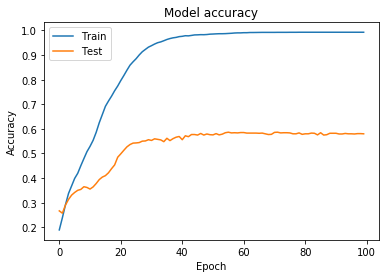

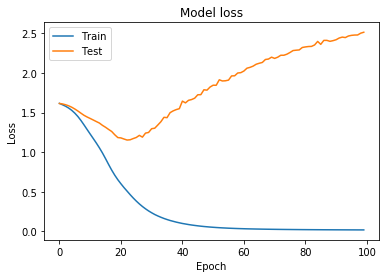

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
loss_and_metrics = model.evaluate(X2, y2, batch_size=128)

27/27 [==============================] - 0s 50us/step


In [42]:
pred = model.predict(X2, batch_size=128)

In [43]:
pr = np.argmax(pred, axis=1)+1
pr

array([2, 4, 3, 2, 2, 3, 4, 3, 5, 3, 2, 5, 2, 2, 1, 4, 5, 5, 1, 1, 3, 1,
       4, 1, 5, 4, 1])

In [44]:
correct = [1 if a == b else 0 for (a, b) in zip(pr, actualVal)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ("Accuracy: " + str(accuracy * 100) + "%")

Accuracy: 48.148148148148145%


In [45]:
for i in pred:
    count = sum(i)
    for j in range(len(i)):
        i[j] = i[j] / count

In [46]:
import copy
countGrade = copy.deepcopy(actualVal)


In [47]:
for i in range(len(countGrade)):
    ans = actualVal[i]
    countGrade[i] = pred[i][ans-1]

In [48]:
result = sum(countGrade) / len(countGrade)
result

0.498125737182536

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                92224     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 45        
Total params: 99,173
Trainable params: 99,173
Non-trainable params: 0
__________________________________________________